### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. URL 찾기

In [3]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [4]:
# 2. request > response : str(html)

In [5]:
response = requests.get(url)
response

<Response [200]>

In [6]:
# 3. bs > DataFrame

In [7]:
dom = BeautifulSoup(response.text, "html.parser")

In [8]:
# select items
# elements = dom.select("#gBestWrap > div > div:nth-child(5) > div > ul > li")
elements = dom.select("#gBestWrap > div.best-list > ul > li")
len(elements)

200

In [9]:
element = elements[0]

In [10]:
# select item data
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img").get("data-original"),
    "o_price": element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': 'Good 건어물 썸머세트 말랑장족+바베큐오징어+참징어+맥반석오징어+숯불채+중쥐포10장+소스10봉',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2094447317&ver=20230824',
 'img': None,
 'o_price': '정가26,500원',
 's_price': '할인가18,500원 30%'}

In [12]:
# make DataFrame
datas = []
for element in elements:
    datas.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": "http:" + element.select_one("img").get("src"),
        "o_price": element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
    })
df = pd.DataFrame(datas)
df.tail(2)

,title,link,img,o_price,s_price
198,(20%쿠폰가:8670원)국산 10켤레 남자 여자 무지 단목 카바 학생 양말,http://item.gmarket.co.kr/Item?goodscode=20619...,http://gdimg.gmarket.co.kr/2061950099/still/30...,"정가36,100원","할인가10,830원 70%"
199,[킨]스프라이트 킨사이다 185ml x 90캔,http://item.gmarket.co.kr/Item?goodscode=19578...,http://gdimg.gmarket.co.kr/1957890750/still/30...,,"할인가27,900원"


In [13]:
df.head()

,title,link,img,o_price,s_price
0,Good 건어물 썸머세트 말랑장족+바베큐오징어+참징어+맥반석오징어+숯불채+중쥐포10...,http://item.gmarket.co.kr/Item?goodscode=20944...,http://gdimg.gmarket.co.kr/2094447317/still/30...,"정가26,500원","할인가18,500원 30%"
1,껍질째 고당도 루비에스(미니) 사과 2kg 중(개당40-50g),http://item.gmarket.co.kr/Item?goodscode=31235...,http://gdimg.gmarket.co.kr/3123544138/still/30...,"정가21,100원","할인가20,900원"
2,훈제오리 슬라이스 800g + 800g,http://item.gmarket.co.kr/Item?goodscode=27919...,http://gdimg.gmarket.co.kr/2791974869/still/30...,"정가29,900원","할인가23,850원 20%"
3,10종 믹스너트 국민안주 믹스넛 800g+800g GG,http://item.gmarket.co.kr/Item?goodscode=15388...,http://gdimg.gmarket.co.kr/1538813893/still/30...,"정가14,300원","할인가10,000원 30%"
4,[엔젯오리진]비타프레쉬 귤젤리 비타민CD 3000 구미 X 2통 100구미/용량업그...,http://item.gmarket.co.kr/Item?goodscode=26149...,http://gdimg.gmarket.co.kr/2614954010/still/30...,"정가37,800원","할인가21,970원 41%"


In [14]:
# 4. download image

In [16]:
# make directory
import os

if not os.path.exists("data"):           
    os.makedirs("data")

In [18]:
%ls data

In [19]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/2094447317/still/300?ver=20230824


In [20]:
# download image

In [21]:
response = requests.get(img_link)
response

<Response [200]>

In [22]:
with open("data/test.png", "wb") as file:
    file.write(response.content)

In [23]:
%ls data

test.png


In [24]:
from PIL import Image as pil

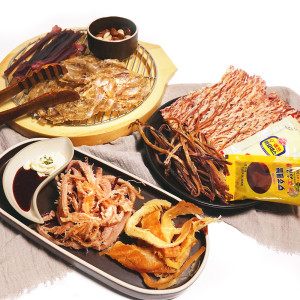

In [25]:
pil.open("data/test.png")

In [26]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"data/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [27]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


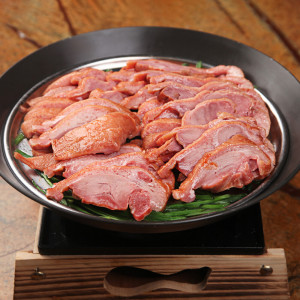

In [28]:
pil.open("data/002.png")